# Data Project

> **Note:** 
> 1. This is a starting point for how to structure your data project 
> 1. The `dataproject.py` file includes functions which can be in this notebook

Import and set magics:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 Aggregate inflation in Denmark

We load the data from statistik banken

In [37]:
#%pip install git+https://github.com/alemartinello/dstapi
#%pip install fredapi

In [38]:
# APIs
from fredapi import Fred
from dstapi import DstApi

PRIS113 = DstApi('PRIS113') 

### 1-1 Basics

In [39]:
metro = DstApi('Pris113')

In [40]:
params = {
    'table': 'Pris113',
    'format': 'BULK',
    'lang': 'en',
    'variables': [
        {'code': 'TYPE', 'values': ['*']},
        {'code': 'Tid', 'values': ['*']}
    ]
}

In [41]:
metro.get_data(params=params)

,TYPE,TID,INDHOLD
0,Consumer price index,1980M01,33.0
1,Consumer price index,1980M05,34.5
2,Consumer price index,1980M09,35.5
3,Consumer price index,1981M01,36.5
4,Consumer price index,1981M05,38.6
...,...,...,...
544,Consumer price index,2018M12,102.1
545,Consumer price index,2020M03,103.3
546,Consumer price index,2022M05,112.7
547,Consumer price index,2023M01,116.4


In [42]:
# Fetch data and assign to df
df = metro.get_data(params=params)

# Make TID a date field
df['TID'] = pd.to_datetime(df['TID'], format='%YM%m').dt.date

In [43]:
#Sorter data by TID
df = df.sort_values(by='TID').reset_index(drop=True)

In [44]:
# Ensure INDHOLD is numeric
df['INDHOLD'] = pd.to_numeric(df['INDHOLD'], errors='coerce')

# Index the CPI to January 2020 = 100
scaling_factor = round(100 / df.loc[df['TID'] == pd.to_datetime('2020-01-01').date(), 'INDHOLD'].values[0], 2)
df['CPI_Indexed'] = df['INDHOLD'] * scaling_factor

In [45]:
# the month-to-month inflation rate
df['Inflation_Rate'] = df['INDHOLD'].pct_change().round(3)

In [52]:
# the 12-month inflation rate
df['Inflation_Rate_12M'] = (df['INDHOLD'] / df['INDHOLD'].shift(12) - 1).round(3)
display(df)

,TYPE,TID,INDHOLD,CPI_Indexed,Inflation_Rate,Inflation_Rate_12M
0,Consumer price index,1980-01-01,33.0,32.010,NaN,NaN
1,Consumer price index,1980-02-01,33.3,32.301,0.009,NaN
2,Consumer price index,1980-03-01,33.8,32.786,0.015,NaN
3,Consumer price index,1980-04-01,34.0,32.980,0.006,NaN
4,Consumer price index,1980-05-01,34.5,33.465,0.015,NaN
...,...,...,...,...,...,...
544,Consumer price index,2025-05-01,120.4,116.788,0.001,0.016
545,Consumer price index,2025-06-01,120.7,117.079,0.002,0.019
546,Consumer price index,2025-07-01,122.5,118.825,0.015,0.023
547,Consumer price index,2025-08-01,121.7,118.049,-0.007,0.020


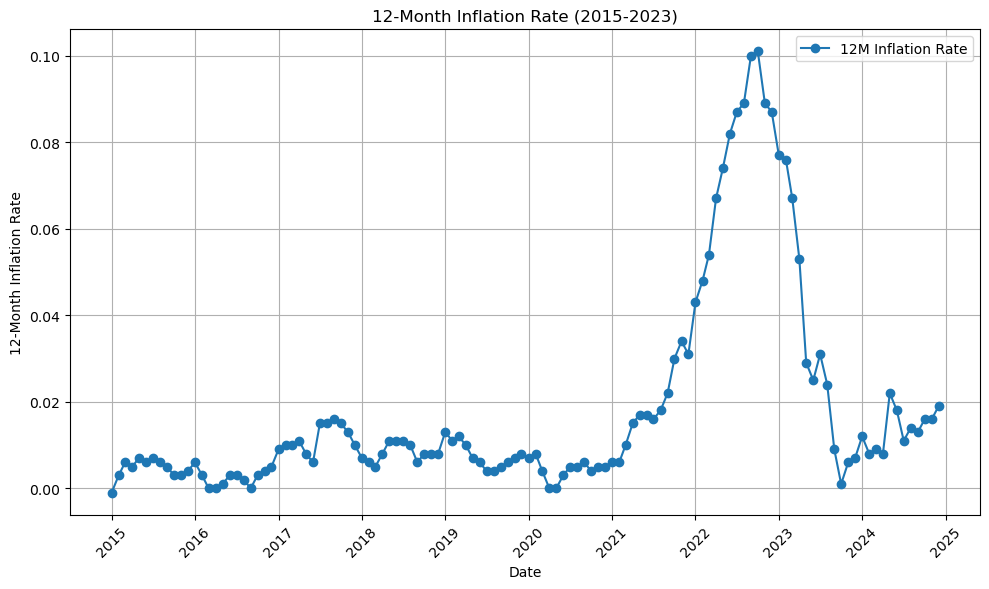

In [47]:
from datetime import date
import matplotlib.pyplot as plt

# Filter 
high_inflation_df = df[(df['TID'] >= date(2015, 1, 1)) & (df['TID'] <= date(2024, 12, 31))]

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(high_inflation_df['TID'], high_inflation_df['Inflation_Rate_12M'], marker='o', label='12M Inflation Rate')
plt.title('12-Month Inflation Rate (2015-2023)')
plt.xlabel('Date')
plt.ylabel('12-Month Inflation Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### 1-2 Instantaneous inflation

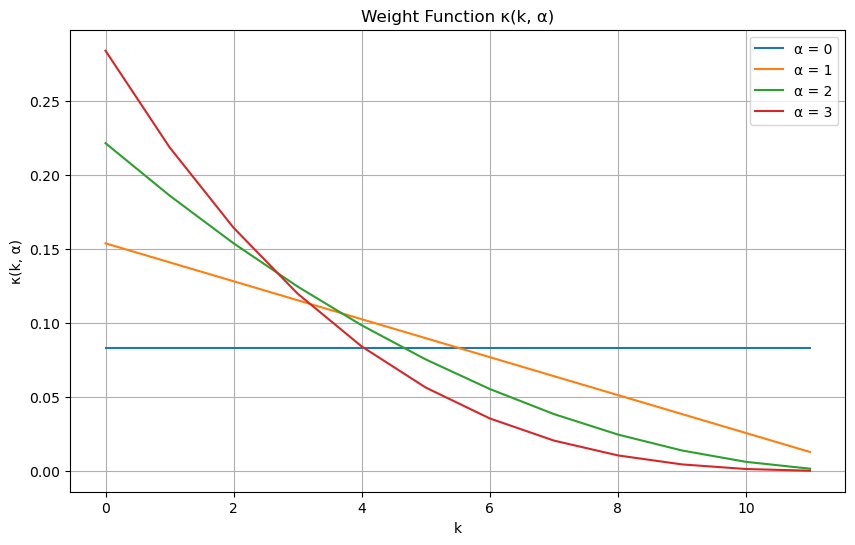

In [48]:
# Step 1: Define and plot κ(k, α)
k_values = np.arange(12)
alpha_values = [0, 1, 2, 3]
T = 12

plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    kappa = (T - k_values) ** alpha / np.sum((T - np.arange(T)) ** alpha)
    plt.plot(k_values, kappa, label=f'α = {alpha}')
plt.xlabel('k')
plt.ylabel('κ(k, α)')
plt.title('Weight Function κ(k, α)')
plt.legend()
plt.grid()
plt.show()

## Question 2

We process the data by ...

In [49]:
data = dataproject.load_data()


In [50]:
data = dataproject.process_data(data)

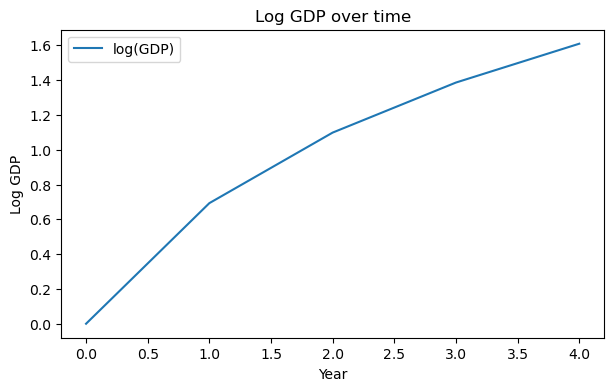

In [51]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)

ax.plot(data['log_GDP'],label='log(GDP)')

ax.set_title('Log GDP over time')
ax.set_xlabel('Year')
ax.set_ylabel('Log GDP')

ax.legend();

We find that that ...